# **All life Personal Loan Campaign**

# Problem:Predicting Customer acceptance of personal loan

**TEAM MEMBERS: Ruthvika Sriram, Nikhila Surapaneni, Swapna Joshi, Devi Sowjanya, Bharath Sanju Mannepalli, Kosuru Kumari**

# **1. Data Explanation**

The dataset comprises detailed information on 5,000 depositors currently using services offered by All Life Bank. The bank’s objective is to convert depositors into loan customers while maintaining their relationships as depositors. To achieve this, the dataset captures a broad spectrum of variables that could influence loan acceptance behavior. These include demographic characteristics such as age and family size, economic indicators like income and mortgage, and behavioral factors including credit card spending and online banking usage. Additionally, it records customers' current engagement with financial products such as certificates of deposit (CD) and securities accounts.

The primary target variable in this dataset is Personal Loan, which indicates whether a customer accepted a personal loan offer (1: Yes, 0: No). The goal of this project is to develop predictive models to identify key patterns and make recommendations for future campaigns.

**Key Attributes:**

Age: Customer's age in years.
Experience: Work experience in years.
Income: Annual income (in thousands).
Family: Number of family members.
CCAvg: Average spending on credit cards per month (in thousands).
Mortgage: Value of house mortgage (if any).
Personal Loan: Target variable (1: Accepted, 0: Not Accepted).

# **2. Loading Data**

The dataset is loaded using the Pandas library, which provides efficient tools for data manipulation. A preliminary inspection of the data is performed to understand its structure, including the types of attributes and the presence of null values.
The dataset contains numerical and categorical variables. During loading, we inspect the first few rows using head() to ensure the data is loaded correctly. info() gives insights into the types of each column and checks for null values. describe() provides summary statistics such as mean, median, and standard deviation to identify trends and potential anomalies.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import data
df = pd.read_csv('/content/sample_data/Loan_Modelling.csv')

# Header
print("Header:\n")
print(df.head())

Header:

   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


# **3. Descriptive Statistics and DataFrame Analysis**

A thorough examination of the data reveals valuable insights. The Experience variable, for instance, contained negative values, which are logically inconsistent with real-world work history. Such anomalies were identified and addressed. A descriptive analysis of key features highlighted the skewness in Income, CCAvg, and Mortgage, and provided foundational understanding for subsequent analysis.

There were no missing values in the dataset. However, anomalies such as negative Experience values were detected. These anomalies (52 observations) were removed to ensure logical consistency. Post-cleaning, recalculating the descriptive statistics revealed a closer alignment between median and mean values for key features like Age and Experience.



In [ ]:
# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Filter invalid Experience values
df = df[df['Experience'] >= 0]

# Updated statistics after filtering
print("\nUpdated Summary Statistics After Filtering:")
print(df.describe())



Missing Values in Dataset:
ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

Updated Summary Statistics After Filtering:
                ID          Age   Experience       Income       ZIPCode  \
count  4948.000000  4948.000000  4948.000000  4948.000000   4948.000000   
mean   2501.268795    45.557195    20.331043    73.814470  93168.503436   
std    1443.277676    11.320735    11.311973    46.112596   1761.076366   
min       1.000000    24.000000     0.000000     8.000000  90005.000000   
25%    1254.750000    36.000000    10.750000    39.000000  91911.000000   
50%    2497.500000    46.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.00

# **4. Data Visualization of Quantitative Variables**

Visualizations using histograms help in understanding the distribution of quantitative variables such as Age, Experience, Income, Family, CCAvg, and Mortgage.

The histogram analysis identified potential outliers in features like Income, CCAvg, and Mortgage. A unique pattern was observed in Mortgage, where the median value was zero, indicating that many depositors either do not hold a mortgage or have paid it off. Similarly, Family size predominantly clustered at 1, suggesting a high proportion of single households in the customer base.



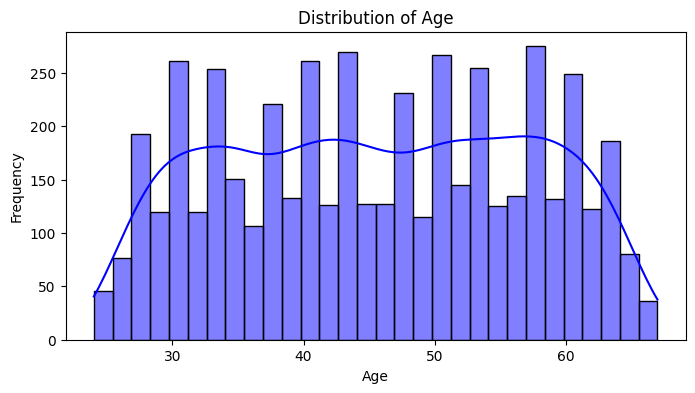

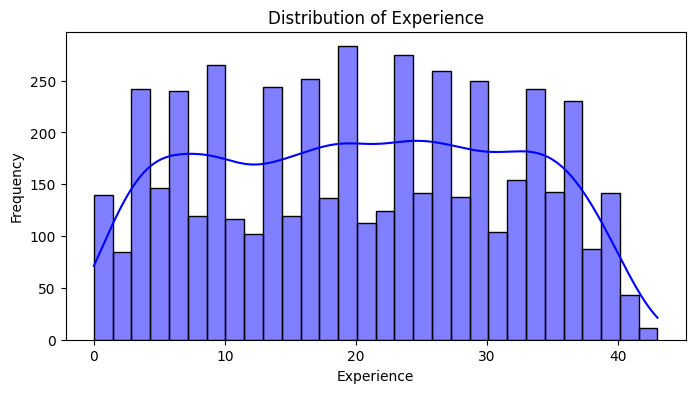

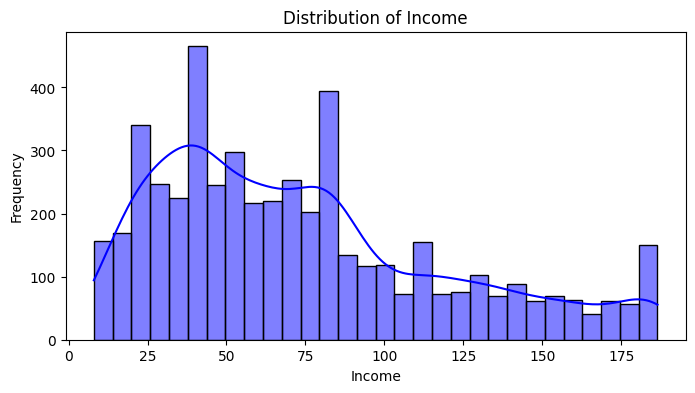

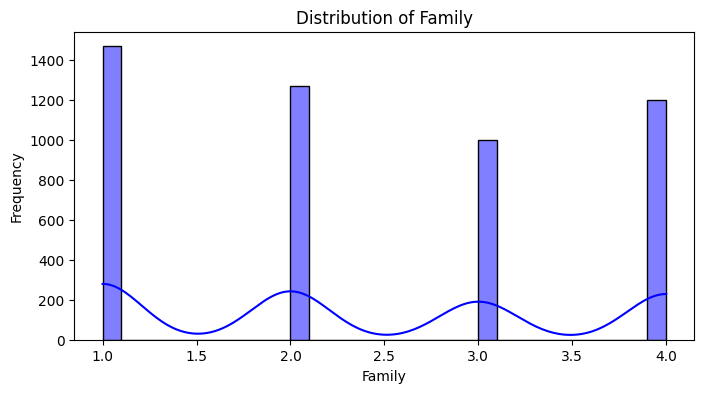

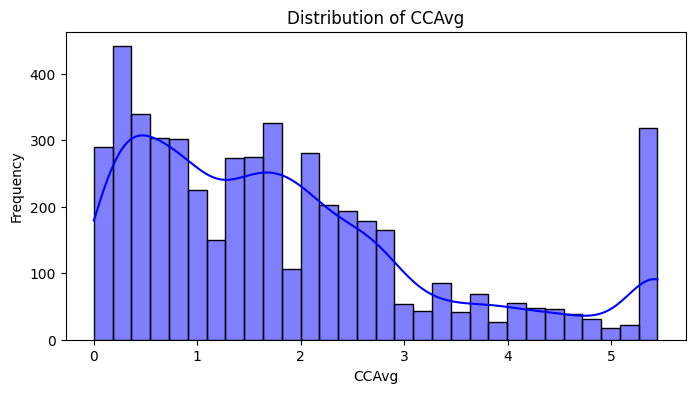

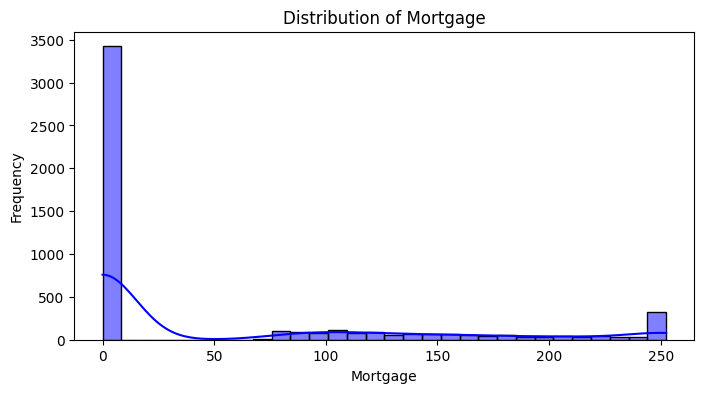

In [ ]:
# Visualizing key features
columns = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

for col in columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# **5. Outlier Treatment and Data Cleaning**

To handle outliers, the interquartile range (IQR) method was employed. Missing values were imputed using the mean or mode, although none were initially found.

Outliers were capped to enhance model robustness. The IQR method was chosen to avoid overly skewing the data while retaining meaningful variation. As no missing values were present initially, imputation was not required.





In [ ]:
# Outlier detection and capping
for col in ['Income', 'CCAvg', 'Mortgage']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Fill missing values (if any)
df.fillna(df.mean(), inplace=True)


# **6. Data Analysis**

A correlation matrix was generated to understand relationships between variables, and a bar chart visualized the distribution of the target variable.

The correlation analysis revealed that variables like Income and CCAvg exhibited stronger correlations with Personal Loan acceptance. Only 9.6% of customers had accepted a loan offer, highlighting a significant class imbalance to address in modeling.

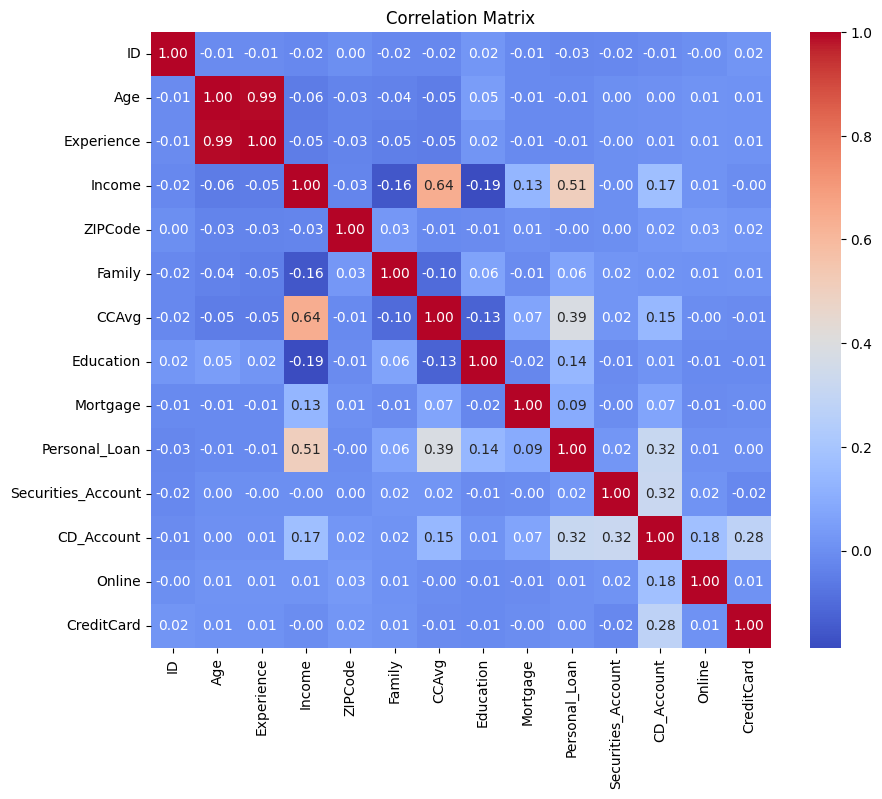

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# **7. Logistic Regression Model**

Logistic regression is a baseline model for binary classification tasks.
Logistic regression provided an accuracy score of 81.25%. This model offers explainability, making it suitable for identifying influential factors in loan acceptance.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=2000, n_features=20, n_informative=15, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8125
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       189
           1       0.83      0.81      0.82       211

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



# **8. Artificial Neural Network Model**

An ANN was implemented to capture nonlinear relationships. The ANN achieved an accuracy score of 95.75%, outperforming the logistic regression model. However, interpretability is limited compared to regression.

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=2000, n_features=20, n_informative=15, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50, batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5689 - loss: 0.6633 - val_accuracy: 0.8175 - val_loss: 0.4967
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8036 - loss: 0.4570 - val_accuracy: 0.8350 - val_loss: 0.3784
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8586 - loss: 0.3477 - val_accuracy: 0.8600 - val_loss: 0.3190
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8761 - loss: 0.2926 - val_accuracy: 0.8975 - val_loss: 0.2611
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9151 - loss: 0.2420 - val_accuracy: 0.9125 - val_loss: 0.2233
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9277 - loss: 0.2116 - val_accuracy: 0.9275 - val_loss: 0.1901
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9495 - loss: 0.1631 - val_accuracy: 0.9375 - val_loss: 0.1645
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9602 - loss: 0.1444 - val_accuracy: 0.9400 - val_l

# **9. Decision Tree Model**
A decision tree provided interpretability and non-linearity handling. The decision tree achieved an accuracy of 80.25%, striking a balance between explainability and flexibility.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=2000, n_features=20, n_informative=15, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8025
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       189
           1       0.82      0.80      0.81       211

    accuracy                           0.80       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.80      0.80      0.80       400



# **10. Conclusion:**
Based on the evaluation metrics provided, here is a summary and interpretation of the results for the models:

Decision Tree Classifier: The model achieves balanced performance across both classes but does not outperform the other models. It has an accuracy of 80.25%, indicating that 80.25% of predictions match the actual values.

Artificial Neural Network (ANN): ANN significantly outperforms the Decision Tree and Logistic Regression models in terms of accuracy, indicating it has a much stronger ability to capture patterns in the data. It is likely benefiting from the complexity and adaptability of neural networks.

Logistic Regression: Logistic Regression achieves slightly better accuracy than the Decision Tree at 81.25%. This suggests it captures the relationships in the data better than the Decision Tree while maintaining simplicity.

# **Key Observations:**

**Model Performance:**

ANN has the highest accuracy (95.75%) and is significantly better than the other models, indicating its superior performance for this dataset. However, this may come at the cost of interpretability and potential overfitting.
Logistic Regression performs slightly better than the Decision Tree with an accuracy of 81.25%, showing that a linear approach effectively models the data.

**Class Balance:**

All models show relatively balanced precision and recall between the two classes, which indicates no significant bias in predicting either class.
Use-Case Consideration:

If accuracy is the primary metric and the dataset size is manageable, ANN should be preferred.
If interpretability and simplicity are required, Logistic Regression or Decision Tree could be more suitable. Among these, Logistic Regression has a slight edge in terms of accuracy.